In [2]:
room = 297.15

distance = .5

# DCR = 20 points/s

diameter = .0495

length = .875

height = .875 + .0495/2

In [3]:
vals = pd.DataFrame({'room temperature (K)':room, 'length of string (m)':length, 'diameter of ball (m)':diameter, 'distance between pivot point and center of mass (m)':height}, index=[''])

NameError: name 'pd' is not defined

In [4]:
vals

NameError: name 'vals' is not defined

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import peakutils
from __future__ import division
%matplotlib inline

In [6]:
data = pd.read_csv('/home/kreidy/PHY-252-labs-master/lab1-data.csv')

In [7]:
data

,Unnamed: 0,time,x,v,a
0,0,0.05,0.823606,-0.488357,-1.354608
1,1,0.10,0.800983,-0.545540,-1.631983
2,2,0.15,0.773178,-0.635018,-1.964846
3,3,0.20,0.738983,-0.752876,-2.068967
4,4,0.25,0.697190,-0.861389,-1.766721
5,5,0.30,0.652115,-0.948027,-1.089897
6,6,0.35,0.598924,-0.967696,-0.427432
7,7,0.40,0.555058,-0.971246,-0.097224
8,8,0.45,0.502902,-0.984966,0.328290
9,9,0.50,0.453510,-0.942558,0.823523


data['time'] = data['Latest: Time (s)']
data['x'] = data['Latest: Position (m)']
data['v'] = data['Latest: Velocity (m/s)']
data['a'] = data['Latest: Acceleration (m/s²)']

/home/kreidy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


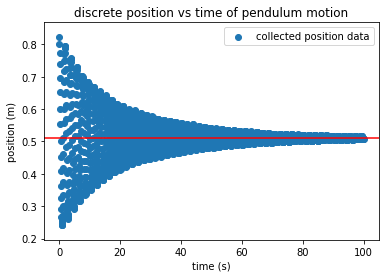

In [528]:
ax = plt.subplot()
fig = plt.subplot(111)
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('discrete position vs time of pendulum motion')
ax.scatter(data['time'], data['x'], label='collected position data')
ax.axhline(np.average(data['x']), color=(1,0,0))
ax.legend()
ax.figure.savefig('lab1_x-t_scatterplot')

/home/kreidy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


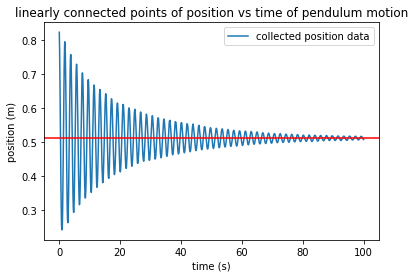

In [530]:
ax = plt.subplot()
fig = plt.subplot(111)
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('linearly connected points of position vs time of pendulum motion')
ax.plot(data['time'], data['x'], label='collected position data')
ax.axhline(np.average(data['x']), color=(1,0,0))
ax.legend()
ax.figure.savefig('lab1_x-t_lineplot')

In [1]:
import scipy

In [9]:
scipy.optimize.curve_fit(data['time'], data['x'])

TypeError: curve_fit() missing 1 required positional argument: 'ydata'

In [10]:
scipy.optimize.curve_fit?

In [6]:
midp = np.average(data['x'])

In [7]:
midp

0.51180992059999997

In [8]:
data['x'][0]-midp

0.31179637940000005

In [40]:
import scipy

In [46]:
interpx = scipy.interp(data['time'], data['time'], data['x'])

/home/kreidy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


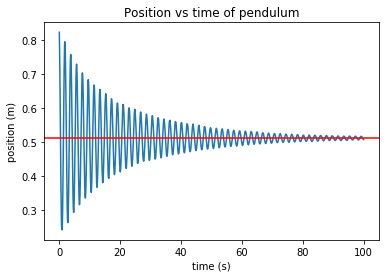

In [526]:
ax = plt.subplot()
fig = plt.subplot(111)
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('Position vs time of pendulum')
ax.plot(data['time'], interpx)
ax.axhline(np.average(data['x']), color=(1,0,0))
ax.legend()
ax.figure.savefig('lab1_x-t_scipyinterpolatedlineplot')

In [53]:
import peakutils as pu

In [88]:
maxes = pu.indexes(data['x'], thres=.5)
mins = pu.indexes(-data['x'], thres=.5)

/home/kreidy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


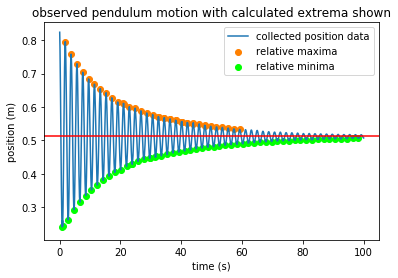

In [537]:
ax = plt.subplot()
fig = plt.subplot(111)
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('observed pendulum motion with calculated extrema shown')
ax.plot(data['time'], data['x'], label='collected position data')
ax.scatter(data['time'][maxes], data['x'][maxes], color=(1,.5,0), label='relative maxima')
ax.scatter(data['time'][mins], data['x'][mins], color=(0,1,0), label='relative minima')
ax.legend()
ax.axhline(np.average(data['x']), color=(1,0,0))
ax.figure.savefig('lab1_x-t_pupeakslineplot')

In [119]:
A

0.28364627939999998

In [160]:
def getrmsd(pos, data=data):
    return np.sqrt(((pos-data['x'])**2).mean())

In [317]:
def getgamma():
    y = 0
    t = data['time']
    phi = midp
    dy = .01
    goody = y
    while dy >= .001:
        currentpos = A*np.e**(-goody*t)*np.cos(w*t+theta)+phi
        rmsd = getrmsd(currentpos)
        for i in range(0,10):
            dummyy = y + i*dy
            newpos = A*np.e**(-dummyy*t)*np.cos(w*t+theta)+phi
            temprmsd = getrmsd(newpos)
#             print(dummyy, temprmsd)
            if temprmsd < rmsd:
                rmsd = temprmsd
                goody = dummyy
        y = goody
        dy /= 10
    return y

In [232]:
y = getgamma()

In [366]:
def getomega():
    w = 0
    t = data['time']
    phi = midp
    dw = 1
    goodw = w
    while dw >= .01:
        currentpos = A*np.e**(-y*t)*np.cos(goodw*t+theta)+phi
        rmsd = getrmsd(currentpos)
        for i in range(0,10):
            dummyw = w + i*dw
            newpos = A*np.e**(-y*t)*np.cos(dummyw*t+theta)+phi
            temprmsd = getrmsd(newpos)
            if temprmsd < rmsd:
                rmsd = temprmsd
                goodw = dummyw
        w = goodw
        dw /= 10
    return w

In [ ]:
w = getomega()

In [492]:
def gettheta():
    t = data['time']
    th = 0
    phi = midp
    dth = np.pi/24
    goodth = th
    while dth >= .01:
        currentpos = A*np.e**(-y*t)*np.cos(w*t+goodth)+phi
        rmsd = getrmsd(currentpos)
        for i in range(0,12):
            dummyth = th + i*dth
            newpos = A*np.e**(-y*t)*np.cos(w*t+dummyth)+phi
            temprmsd = getrmsd(newpos)
            if temprmsd < rmsd:
                rmsd = temprmsd
                goodth = dummyth
        th = goodth
        dth /= 10
    return th

In [493]:
gettheta()

0

In [486]:
np.pi/12

0.2617993877991494

In [ ]:
print(y, w, theta)

In [494]:
def realA():
    A = max(max(abs(data['x'][maxes]-midp)), max(abs(data['x'][mins]-midp)))
    t = data['time']
    phi = midp
    dA = 1
    goodA = A
    while dA >= .001:
        currentpos = goodA*np.e**(-y*t)*np.cos(w*t+theta)+phi
        rmsd = getrmsd(currentpos)
        for i in range(0,10):
            dummyA = A + i*dA
            newpos = dummyA*np.e**(-y*t)*np.cos(w*t+theta)+phi
            temprmsd = getrmsd(newpos)
            if temprmsd < rmsd:
                rmsd = temprmsd
                goodA = dummyA
        A = goodA
        dA /= 10
    return A

In [495]:
def getvars(cutoff, A=A, y=y, w=w, theta=theta):
    t = data['time']
    phi = midp
    A = max(max(abs(data['x'][maxes]-midp)), max(abs(data['x'][mins]-midp)))
    y = 0
#     w = 0
    pos = A*np.e**(-y*t)*np.cos(w*t+theta)+phi
    rmsd = getrmsd(pos)
    while rmsd > cutoff:
        theta = gettheta()
        w = getomega()
        y = getgamma()
        A = realA()
        pos = A*np.e**(-y*t)*np.cos(w*t+theta)+phi
        tempval = getrmsd(pos)
        if tempval < rmsd:
            rmsd = tempval
    return A, y, w, theta, rmsd

In [511]:
values = []
i = 60
A, y, w, theta, rmsd = getvars(1/i)
print('co', 1/i, 'amp', A, 'gamma', y, 'omega', w, 'theta', theta, 'rmsd', rmsd)
values.append([1/i, A, y, w, theta, rmsd])

co 0.016666666666666666 amp 0.3076462794 gamma 0.054000000000000006 omega 3.3 theta 0 rmsd 0.014715774933


0.014715774933


/home/kreidy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


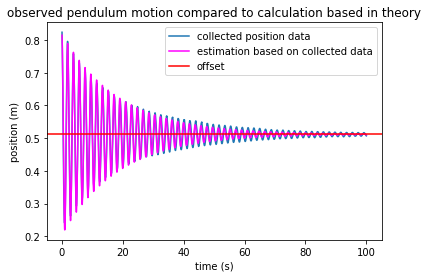

In [535]:
t = data['time']
phi = midp
# y = .05
pos = A*np.e**(-y*t)*np.cos(w*t+theta)+phi
print(getrmsd(pos))
ax = plt.subplot()
fig = plt.subplot(111)
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('observed pendulum motion compared to calculation based in theory')
ax.plot(data['time'], data['x'], label='collected position data')
ax.plot(t, pos, color=(1,0,1), label='estimation based on collected data')
ax.axhline(np.average(data['x']), color=(1,0,0), label='offset')
ax.legend()
# ax.set_xlim(0, 30)
# ax.set_ylim(.4, .6)
ax.figure.savefig('lab1_x-t_estimated')

In [519]:
theta

0

In [443]:
y

0.05

In [542]:
print(A, y, w, theta)

0.3076462794 0.054000000000000006 3.3 0


In [543]:
phi

0.51180992059999997

In [559]:
angfreq = np.sqrt(9.807/height)

In [560]:
angfreq

3.3014685156070045

In [540]:
np.sqrt(((w - angfreq)**2).mean())

0.0014685156070046723

0.03726656499077835

In [400]:
periods = []
for i in range(len(maxes)-1):
    periods.append(data['time'][i+1]-data['time'][i])

In [402]:
np.average(periods)

0.049999999999999996

In [332]:
np.sqrt(((periods-np.average(periods))**2).mean())

7.4346613509906198e-17

In [333]:
T = np.average(periods)

In [360]:
w = 2*np.pi/T

In [363]:
w

125.66370614359174

In [364]:
T

0.049999999999999996

In [562]:
data['x'][maxes]

36      0.795456
75      0.757980
113     0.729312
152     0.703753
190     0.683892
228     0.667831
267     0.654706
305     0.642444
342     0.627246
382     0.614639
419     0.610667
421     0.609458
458     0.600651
496     0.596333
534     0.588216
573     0.581999
611     0.577336
648     0.570946
651     0.569910
686     0.567147
689     0.567147
724     0.562829
727     0.563866
762     0.559893
764     0.559548
800     0.555403
802     0.555749
804     0.556267
838     0.552295
840     0.553158
876     0.549359
879     0.552813
918     0.549186
953     0.544869
955     0.544350
993     0.542105
1031    0.540206
1070    0.538651
1108    0.536752
1146    0.534334
1184    0.532779
Name: x, dtype: float64

In [563]:
data['time'][458]

22.949999999999999